In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-09-24 02:41:09.004422: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-24 02:41:11.140876: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 02:41:11.141709: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-09-24 02:41:11.626509: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 02:41:11.630450: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13065, 512, 512, 1) (13065, 512, 512, 1) (3701, 512, 512, 1) (3701, 512, 512, 1)


In [9]:
X_train, y_train, X_test, y_test = C.Helper.filter_slices(X_train, y_train, X_test, y_test)

(554, 512, 512, 1) (554, 512, 512, 1) (160, 512, 512, 1) (160, 512, 512, 1)


In [10]:
train_gen = C.Helper.augment(X_train, y_train)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:
model = C.Helper.create_unet(X_train[0].shape)

2023-09-24 02:43:43.474333: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 02:43:43.476891: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 02:43:43.486648: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-09-24 02:43:43.489625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 02:43:43.492248: I tensorflow/core

In [12]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_test, y_test, model, epochs=200)

2023-09-24 02:43:44.732427: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-24 02:43:44.752747: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-09-24 02:43:45.990139: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-09-24 02:43:46.854877: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-09-24 02:43:47.930363: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-09-24 02:43:47.930390: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-09-24 02:43:47.930924: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-09-24 02:43:48.031337: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-09-24 02:43:49.083525: I tensorflow/stream_exec

18/18 [==============================] - 48s 2s/step - loss: 1.2726 - iou: 1.5142e-04 - iou_thresholded: 6.8033e-04 - val_loss: 0.0097 - val_iou: 1.9819e-05 - val_iou_thresholded: 6.2365e-04
Epoch 2/200
18/18 [==============================] - 18s 990ms/step - loss: 0.0090 - iou: 3.8866e-04 - iou_thresholded: 8.1868e-04 - val_loss: 0.0030 - val_iou: 2.5563e-04 - val_iou_thresholded: 6.2365e-04
Epoch 3/200
18/18 [==============================] - 18s 991ms/step - loss: 0.0026 - iou: 2.7711e-04 - iou_thresholded: 8.0816e-04 - val_loss: 0.0022 - val_iou: 4.9325e-04 - val_iou_thresholded: 6.2365e-04
Epoch 4/200
18/18 [==============================] - 18s 989ms/step - loss: 0.0018 - iou: 4.7613e-04 - iou_thresholded: 8.0815e-04 - val_loss: 0.0018 - val_iou: 7.7641e-04 - val_iou_thresholded: 6.2365e-04
Epoch 5/200
18/18 [==============================] - 18s 994ms/step - loss: 0.0016 - iou: 5.8927e-04 - iou_thresholded: 8.1819e-04 - val_loss: 0.0017 - val_iou: 8.5802e-04 - val_iou_threshold

Epoch 42/200
18/18 [==============================] - 18s 983ms/step - loss: 2.6050e-04 - iou: 0.3974 - iou_thresholded: 0.5477 - val_loss: 6.2430e-04 - val_iou: 0.3136 - val_iou_thresholded: 0.4018
Epoch 43/200
18/18 [==============================] - 18s 991ms/step - loss: 2.4090e-04 - iou: 0.4156 - iou_thresholded: 0.5595 - val_loss: 5.0289e-04 - val_iou: 0.3308 - val_iou_thresholded: 0.4849
Epoch 44/200
18/18 [==============================] - 18s 987ms/step - loss: 2.2707e-04 - iou: 0.4424 - iou_thresholded: 0.5938 - val_loss: 8.5326e-04 - val_iou: 0.2994 - val_iou_thresholded: 0.3519
Epoch 45/200
18/18 [==============================] - 18s 986ms/step - loss: 2.2614e-04 - iou: 0.4578 - iou_thresholded: 0.5916 - val_loss: 9.2412e-04 - val_iou: 0.3238 - val_iou_thresholded: 0.3955
Epoch 46/200
18/18 [==============================] - 18s 989ms/step - loss: 2.0903e-04 - iou: 0.4719 - iou_thresholded: 0.6036 - val_loss: 7.2339e-04 - val_iou: 0.3327 - val_iou_thresholded: 0.4450
Epoch

18/18 [==============================] - 18s 987ms/step - loss: 1.2019e-04 - iou: 0.6424 - iou_thresholded: 0.7420 - val_loss: 0.0011 - val_iou: 0.4163 - val_iou_thresholded: 0.4606
Epoch 84/200
18/18 [==============================] - 18s 989ms/step - loss: 1.2343e-04 - iou: 0.6456 - iou_thresholded: 0.7391 - val_loss: 7.8687e-04 - val_iou: 0.4382 - val_iou_thresholded: 0.4863
Epoch 85/200
18/18 [==============================] - 18s 986ms/step - loss: 1.5313e-04 - iou: 0.5882 - iou_thresholded: 0.6955 - val_loss: 7.5507e-04 - val_iou: 0.4034 - val_iou_thresholded: 0.4869
Epoch 86/200
18/18 [==============================] - 18s 987ms/step - loss: 1.8283e-04 - iou: 0.5498 - iou_thresholded: 0.6536 - val_loss: 5.5407e-04 - val_iou: 0.4320 - val_iou_thresholded: 0.5076
Epoch 87/200
18/18 [==============================] - 18s 987ms/step - loss: 2.8954e-04 - iou: 0.4602 - iou_thresholded: 0.5768 - val_loss: 8.1210e-04 - val_iou: 0.2450 - val_iou_thresholded: 0.3778
Epoch 88/200
18/18 [==

18/18 [==============================] - 18s 987ms/step - loss: 8.0527e-05 - iou: 0.7361 - iou_thresholded: 0.8132 - val_loss: 0.0011 - val_iou: 0.4725 - val_iou_thresholded: 0.5016
Epoch 125/200
18/18 [==============================] - 18s 986ms/step - loss: 8.1237e-05 - iou: 0.7377 - iou_thresholded: 0.8122 - val_loss: 0.0010 - val_iou: 0.4601 - val_iou_thresholded: 0.4862
Epoch 126/200
18/18 [==============================] - 18s 989ms/step - loss: 8.1395e-05 - iou: 0.7309 - iou_thresholded: 0.8066 - val_loss: 0.0012 - val_iou: 0.4502 - val_iou_thresholded: 0.4750
Epoch 127/200
18/18 [==============================] - 18s 985ms/step - loss: 7.9674e-05 - iou: 0.7395 - iou_thresholded: 0.8159 - val_loss: 0.0014 - val_iou: 0.4744 - val_iou_thresholded: 0.5036
Epoch 128/200
18/18 [==============================] - 18s 984ms/step - loss: 8.2308e-05 - iou: 0.7349 - iou_thresholded: 0.8088 - val_loss: 0.0012 - val_iou: 0.4600 - val_iou_thresholded: 0.4903
Epoch 129/200
18/18 [=============

Epoch 166/200
18/18 [==============================] - 18s 985ms/step - loss: 5.1262e-05 - iou: 0.8186 - iou_thresholded: 0.8761 - val_loss: 0.0015 - val_iou: 0.4808 - val_iou_thresholded: 0.4972
Epoch 167/200
18/18 [==============================] - 18s 984ms/step - loss: 4.8958e-05 - iou: 0.8271 - iou_thresholded: 0.8844 - val_loss: 0.0016 - val_iou: 0.4766 - val_iou_thresholded: 0.4955
Epoch 168/200
18/18 [==============================] - 18s 989ms/step - loss: 4.9816e-05 - iou: 0.8228 - iou_thresholded: 0.8785 - val_loss: 0.0017 - val_iou: 0.4778 - val_iou_thresholded: 0.4974
Epoch 169/200
18/18 [==============================] - 18s 983ms/step - loss: 5.0009e-05 - iou: 0.8208 - iou_thresholded: 0.8782 - val_loss: 0.0017 - val_iou: 0.4672 - val_iou_thresholded: 0.4816
Epoch 170/200
18/18 [==============================] - 18s 988ms/step - loss: 4.6523e-05 - iou: 0.8321 - iou_thresholded: 0.8889 - val_loss: 0.0015 - val_iou: 0.4857 - val_iou_thresholded: 0.5001
Epoch 171/200
18/18 

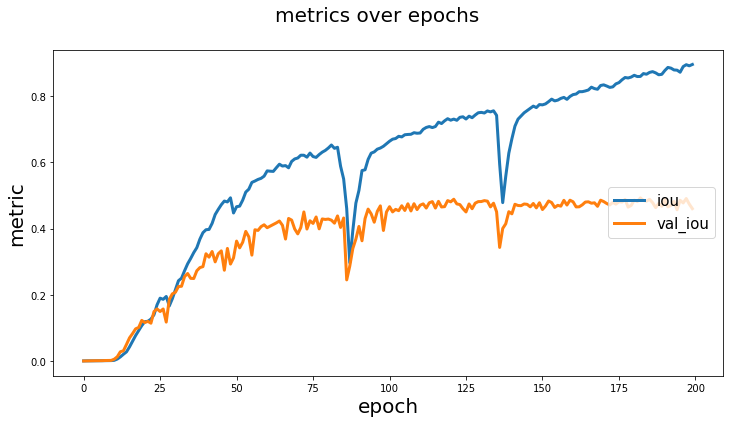

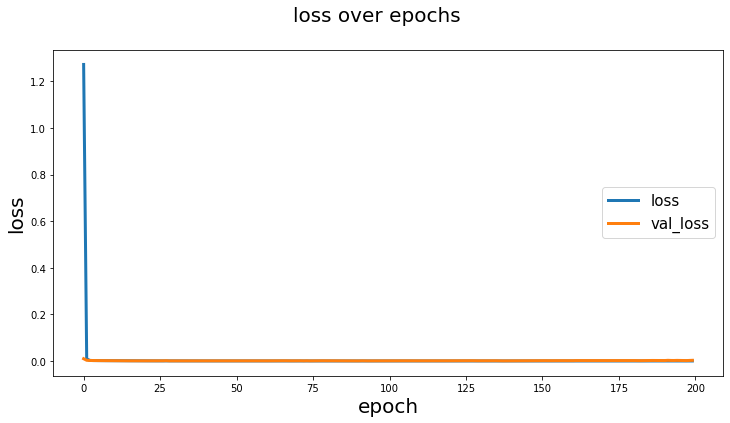

In [13]:
C.Helper.visualize_graph(history)

In [14]:
y_pred = C.Helper.prediction(X_test, model)

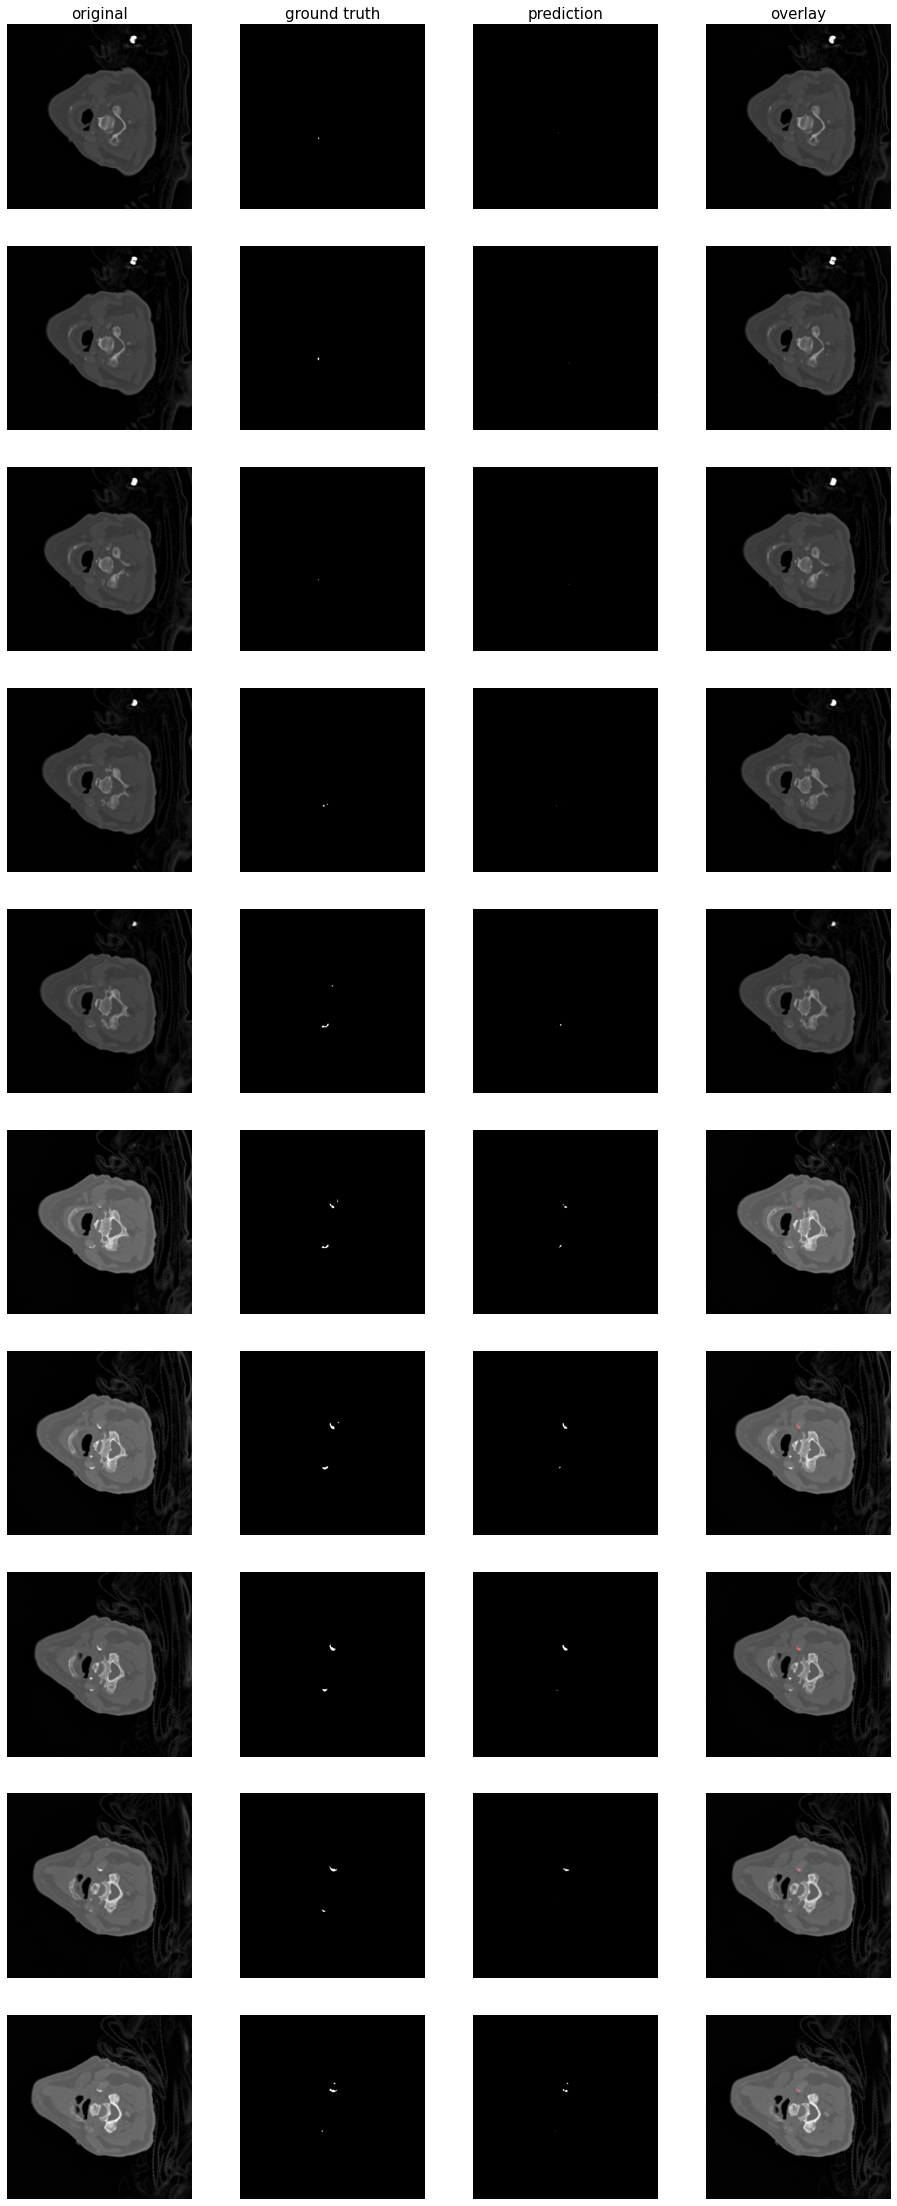

In [15]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [16]:
C.Helper.evaluate(X_test, y_test, model)

5/5 [==============================] - 1s 220ms/step - loss: 0.0029 - iou: 0.4602 - iou_thresholded: 0.4675
